In [2]:
from sklearn.decomposition import PCA

In [3]:
pca=PCA()

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns

In [5]:
data=pd.read_csv(r"C:\Users\naruk\OneDrive\Desktop\ammu\mnist_test.csv")
data.describe

<bound method NDFrame.describe of       label  1x1  1x2  1x3  1x4  1x5  1x6  1x7  1x8  1x9  ...  28x19  28x20  \
0         7    0    0    0    0    0    0    0    0    0  ...      0      0   
1         2    0    0    0    0    0    0    0    0    0  ...      0      0   
2         1    0    0    0    0    0    0    0    0    0  ...      0      0   
3         0    0    0    0    0    0    0    0    0    0  ...      0      0   
4         4    0    0    0    0    0    0    0    0    0  ...      0      0   
...     ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...    ...    ...   
9995      2    0    0    0    0    0    0    0    0    0  ...      0      0   
9996      3    0    0    0    0    0    0    0    0    0  ...      0      0   
9997      4    0    0    0    0    0    0    0    0    0  ...      0      0   
9998      5    0    0    0    0    0    0    0    0    0  ...      0      0   
9999      6    0    0    0    0    0    0    0    0    0  ...      0      0   

      28x21  28x2

In [6]:

from sklearn.preprocessing import StandardScaler

In [41]:
sc=StandardScaler()
sample_data=sc.fit_transform(data)

In [42]:
pca.n_components=3
pca_data=pca.fit_transform(sample_data)


In [43]:
pca_data.shape
labels=data.head(60000)
pca_data=np.vstack((pca_data.T,data.label)).T

In [45]:
pca_df=pd.DataFrame(data=pca_data,columns=("first","second","third","label"))

In [46]:
import matplotlib.pyplot as plt
import plotly.express as px
fig = px.scatter_3d(pca_df,x='first', y='second', z='third',color="label")
fig.show()

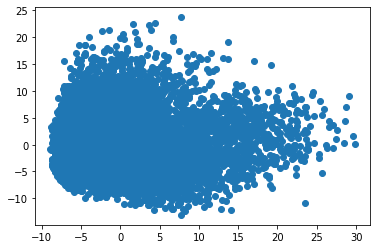

In [12]:
plt.scatter(pca_df['first'],pca_df["second"])

In [13]:
print(labels.shape)
print(pca_data.shape)

(10000, 785)
(10000, 3)


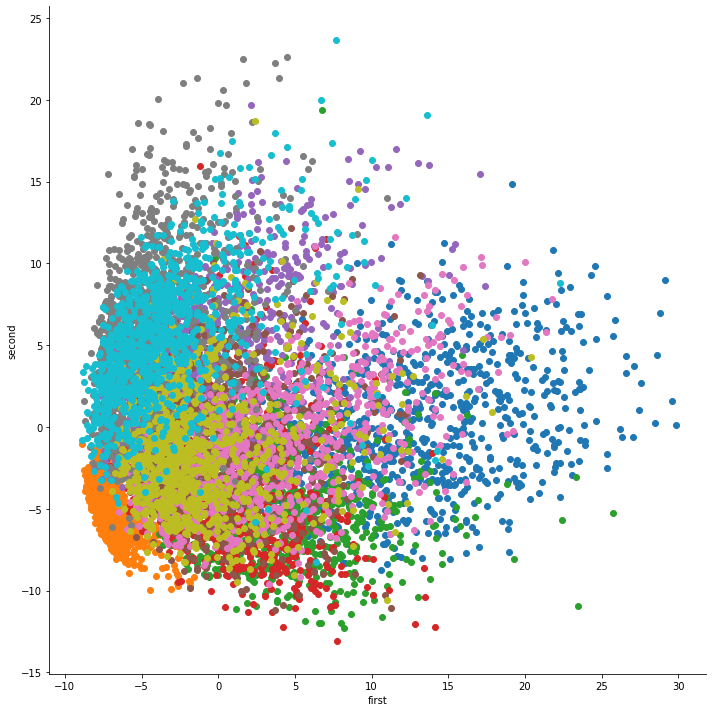

In [25]:
sns.FacetGrid(pca_df,hue="label",size=10).map(plt.scatter,'first','second')

In [26]:
import tsne

In [48]:
tsne_data=tsne.bh_sne(sample_data,max_iter=3000,perplexity=40,d=3)

In [49]:
tsne_data=pd.DataFrame(data=tsne_data,columns=("first","second","third"))

In [50]:
tsne_data["label"]=data.label

In [51]:
import plotly.express as px
fig = px.scatter_3d(tsne_data,x='first', y='second', z='third',color="label")
fig.show()

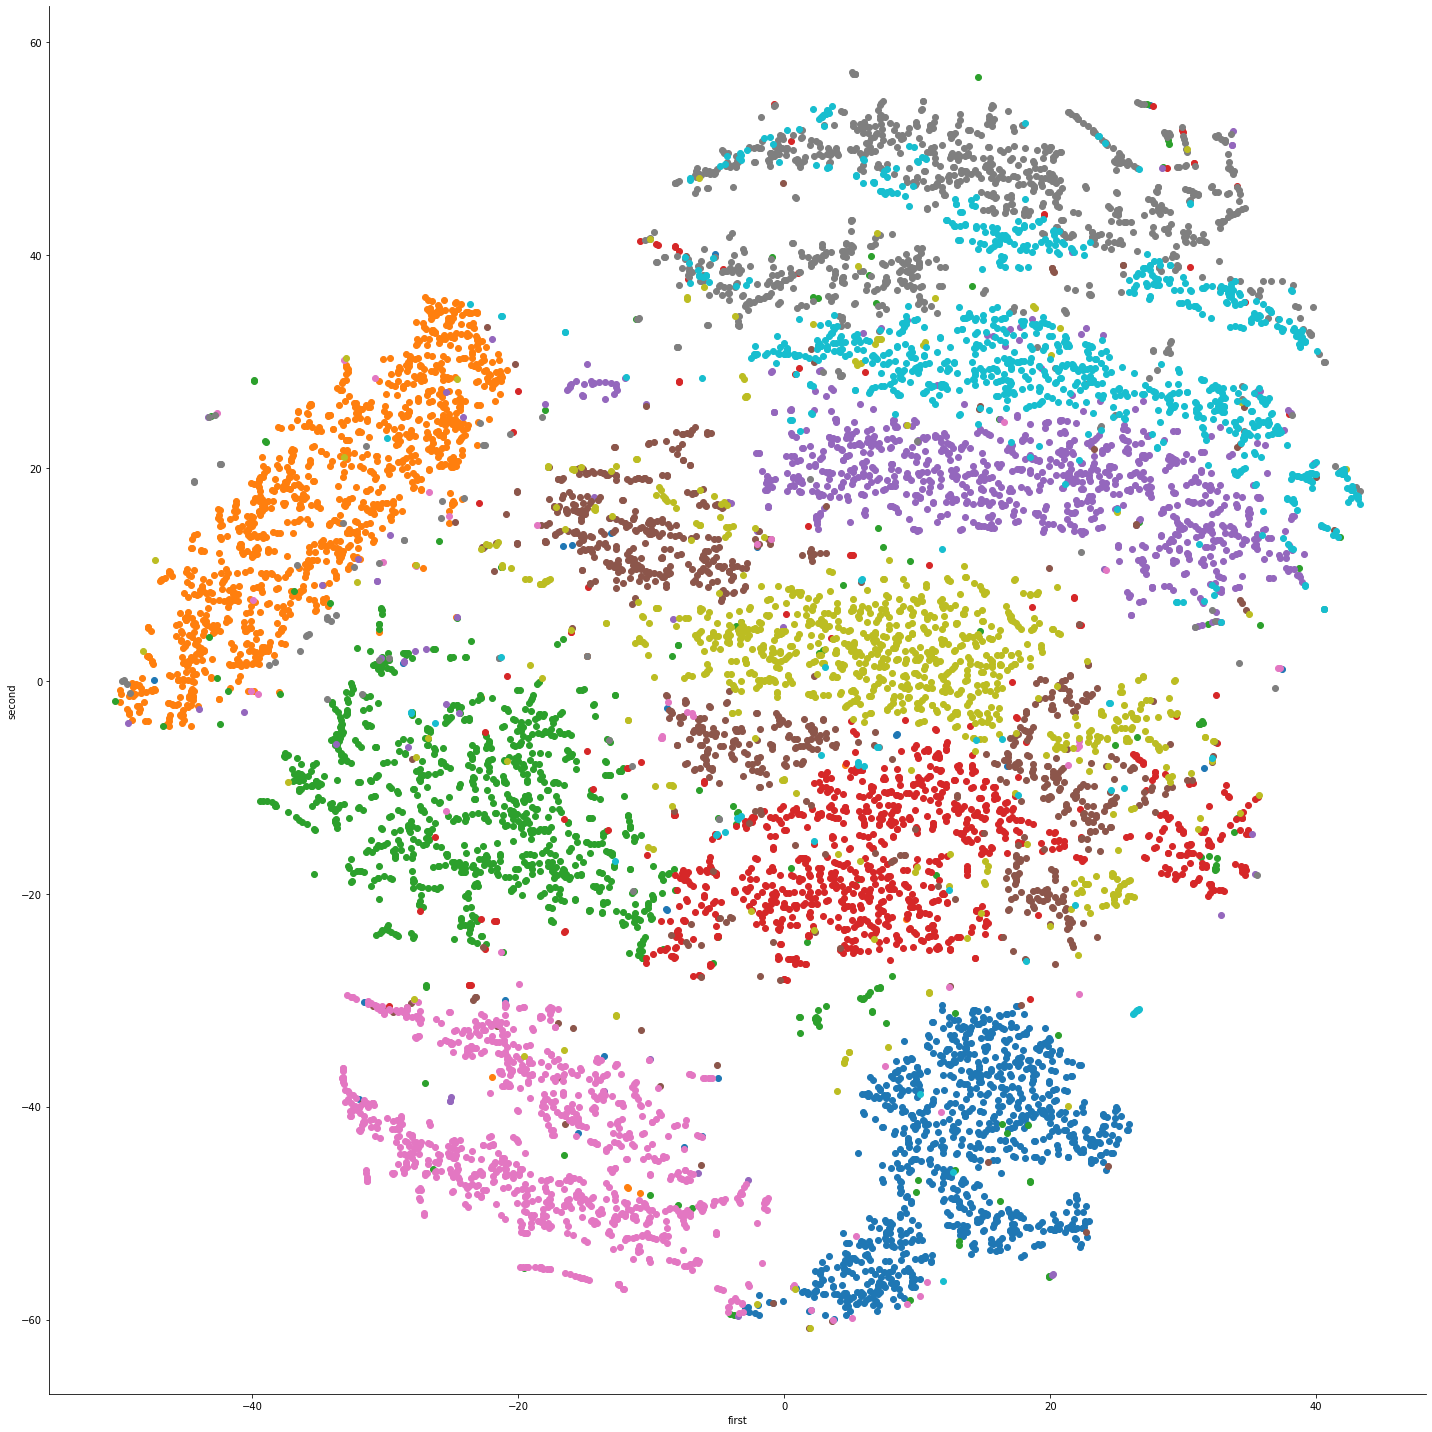

In [39]:
sns.FacetGrid(tsne_data,hue="label",size=20,).map(plt.scatter,"first","second")